In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import os
import cv2
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/MLB-LAB/K-Means/data')

Found 10 files belonging to 2 classes.


In [ ]:
data.class_names

['cat', 'dog']

In [ ]:
data=data.map(lambda x,y:(x/255,y))

In [ ]:
scaled_iterator=data.as_numpy_iterator()

In [ ]:
scaled_batch=scaled_iterator.next()

In [ ]:
scaled_batch[0].max()

1.0

In [ ]:
scaled_batch[0].min()

0.0

In [ ]:
scaled_batch[1]

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int32)

In [ ]:
scaled_batch[0]

array([[[[0.2901961 , 0.37254903, 0.21960784],
         [0.2901961 , 0.37254903, 0.21960784],
         [0.29411766, 0.3764706 , 0.22352941],
         ...,
         [0.28627452, 0.36862746, 0.21568628],
         [0.2784314 , 0.36078432, 0.20784314],
         [0.28161764, 0.36789215, 0.21887255]],

        [[0.2901961 , 0.37254903, 0.21960784],
         [0.29362744, 0.37990198, 0.22696078],
         [0.2901961 , 0.37254903, 0.21960784],
         ...,
         [0.28627452, 0.36862746, 0.21568628],
         [0.2784314 , 0.36078432, 0.20784314],
         [0.2784314 , 0.36078432, 0.20784314]],

        [[0.2901961 , 0.3764706 , 0.22352941],
         [0.2901961 , 0.3764706 , 0.22352941],
         [0.2867647 , 0.37303922, 0.22009803],
         ...,
         [0.2901961 , 0.37254903, 0.21960784],
         [0.28627452, 0.36862746, 0.21568628],
         [0.2784314 , 0.36078432, 0.20784314]],

        ...,

        [[0.2735294 , 0.33088234, 0.1985294 ],
         [0.2784314 , 0.30980393, 0.16470589]

IndexError: index 4 is out of bounds for axis 0 with size 4

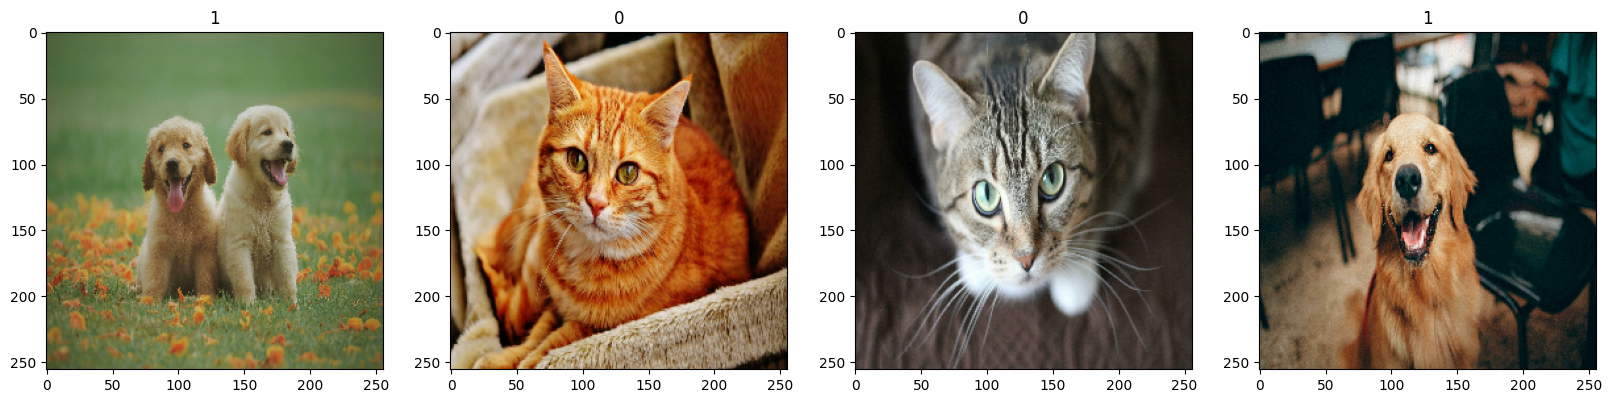

In [ ]:
# fig,ax = plt.subplots(ncols=4,figsize=(20,20))
# for idx,img in enumerate(scaled_batch[0]):
#   ax[idx].imshow(img)
#   ax[idx].title.set_text(scaled_batch[1][idx])

In [ ]:
# len(data)

In [ ]:
# train_size=int(len(data)*0.7)

In [ ]:
# val_size=int(len(data)*0.2)

In [ ]:
# test_size=int(len(data)*0.1)+1

In [ ]:
# train=data.take(train_size)
# validate=data.skip(train_size).take(val_size)
# test=data.skip(train_size+val_size).take(test_size)

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(16,(3,3),1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

In [ ]:
model.add(Conv2D(32,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

In [ ]:
model.add(Conv2D(16,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(256, activation='relu'))

In [ ]:
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.fit(data, epochs=10)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.6801 - accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: 0.6844 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: 1.4829 - accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 0.6777 - accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 0.4840 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 0.4513 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 1s 1s/step - loss: 0.3647 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 1s 1s/step - loss: 0.3579 - accuracy: 0.9000
Epoch 9/10
1/1 [==============================] - 1s 1s/step - loss: 0.2604 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 1s 1s/step - loss: 0.2306 - accuracy: 0.9000


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

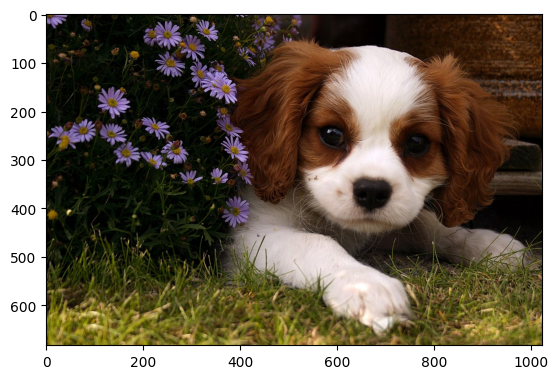

In [ ]:
img=cv2.imread('/content/drive/MyDrive/MLB-LAB/Dataset/Cute_dog.jpg')
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.show()

In [ ]:
img.shape

(683, 1024, 3)

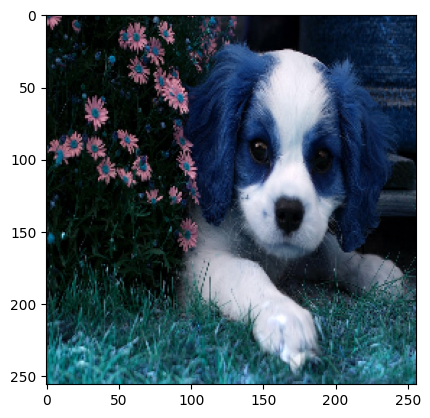

In [ ]:
resize = tf.image.resize(img, (256, 256))
# plt.imshow(resize.numpy().astype(int))
# plt.show()

In [ ]:
predictedClass = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 43ms/step


In [ ]:
predictedClass

array([[0.1641972]], dtype=float32)

In [ ]:
if predictedClass > 0.5:
  print("Cat Image")
elif predictedClass < 0.5:
  print("Dog Image")

Dog Image


**Q-LEARNING**

In [ ]:
path={0:[4], 1:[5,3], 2:[3], 3:[4,1,2], 4:[0,5,3], 5:[1,4,5]}

In [ ]:
q_table={0:[0,0,0,0,0,0],
         1:[0,0,0,0,0,0],
         2:[0,0,0,0,0,0],
         3:[0,0,0,0,0,0],
         4:[0,0,0,0,0,0],
         5:[0,0,0,0,0,0]}

In [ ]:
r_table = {0:[-1,-1,-1,-1,0,-1],
           1:[-1,-1,-1,0,-1,100],
           2:[-1,-1,-1,0,-1,-1],
           3:[-1,0,0,-1,0,-1],
           4:[0,-1,-1,0,-1,100],
           5:[-1,0,-1,-1,0,100]}

In [ ]:
gamma = 0.8
def Q_Value(frm,dest):
    q_value = r_table[frm][dest] + gamma*max(q_table[dest][i] for i in path[dest])
    q_table[frm][dest] = q_value
    return q_table[frm][dest]

Move from 1 to 5

In [ ]:
print(Q_Value(1,5))

100.0


In [ ]:
q_table

{0: [0, 0, 0, 0, 0, 0],
 1: [0, 0, 0, 0, 0, 100.0],
 2: [0, 0, 0, 0, 0, 0],
 3: [0, 0, 0, 0, 0, 0],
 4: [0, 0, 0, 0, 0, 0],
 5: [0, 0, 0, 0, 0, 0]}

Move from 2 to 5 via 1

In [ ]:
print(Q_Value(2,1))

79.0


In [ ]:
print(Q_Value(1,5))

100.0


In [ ]:
q_table

{0: [0, 0, 0, 0, 0, 0],
 1: [0, 0, 0, 0, 0, 100.0],
 2: [0, 79.0, 0, 0, 0, 0],
 3: [0, 0, 0, 0, 0, 0],
 4: [0, 0, 0, 0, 0, 0],
 5: [0, 0, 0, 0, 0, 0]}

Move from 3 to 5 via 4

In [ ]:
print(Q_Value(3,4))

0.0


In [ ]:
print(Q_Value(4,5))

100.0


In [115]:
q_table

{0: [0, 0, 0, 0, 0, 0],
 1: [0, 0, 0, 0, 0, 100.0],
 2: [0, 79.0, 0, 0, 0, 0],
 3: [0, 0, 0, 0, 0.0, 0],
 4: [0, 0, 0, 0, 0, 100.0],
 5: [0, 0, 0, 0, 0, 0]}

EM CLUSTERING

In [1]:
import numpy as np
import pandas as pd

In [2]:
toss = ['H','T']

In [3]:
toss_results = [list(np.random.choice(toss,10,replace=True,p=[0.5,0.5])) for i in range(5)]

In [4]:
toss_results = [["H","T","T","T","H","H","T","H","T","H"],
                ["H","H","H","H","T","H","H","H","H","H"],
                ["H","T","H","H","H","H","H","T","H","H"],
                ["H","T","H","T","T","T","H","H","T","T"],
                ["T","H","H","H","T","H","H","H","T","H"]]

In [5]:
theta1 = 0.6
theta2 = 0.5

In [6]:
def EM_algo(itr,theta1,theta2):
    def Likelihood(theta,heads):
        return pow(theta,heads)*(pow((1-theta),10-heads))

    def probability(heads):
        coin1 = (Likelihood(theta1,heads))/( Likelihood(theta1,heads) + Likelihood(theta2,heads) )
        coin2 = (Likelihood(theta2,heads))/( Likelihood(theta1,heads) + Likelihood(theta2,heads) )
        return coin1,coin2
    for i in range(itr):
        iter=[["P(A)","P(B)","L(A)|H","L(A)|T","L(B)|H","L(B)|T"]]
        for i in toss_results:
            a,b = probability(i.count('H'))[0], probability(i.count('H'))[1]
            iter.append([a,b,a*i.count('H'),a*i.count('T'),b*i.count('H'),b*i.count('T')])
        data = pd.DataFrame(data={"P(A)":[iter[i][0] for i in range(1,len(iter))],
                          "P(B)":[iter[i][1] for i in range(1,len(iter))],
                          "L(A)|H":[iter[i][2] for i in range(1,len(iter))],
                          "L(A)|T":[iter[i][3] for i in range(1,len(iter))],
                          "L(B)|H":[iter[i][4] for i in range(1,len(iter))],
                          "L(B)|T":[iter[i][5] for i in range(1,len(iter))]})
        print(data)
        iter.clear()
        theta1 = round(data.iloc[:,2].sum() / (data.iloc[:,2].sum()+data.iloc[:,3].sum()),2)
        theta2 = round(data.iloc[:,4].sum() / (data.iloc[:,4].sum()+data.iloc[:,5].sum()),2)

    return theta1,theta2

In [7]:
EM_algo(10,theta1,theta2)

       P(A)      P(B)    L(A)|H    L(A)|T    L(B)|H    L(B)|T
0  0.449149  0.550851  2.245745  2.245745  2.754255  2.754255
1  0.804986  0.195014  7.244870  0.804986  1.755130  0.195014
2  0.733467  0.266533  5.867737  1.466934  2.132263  0.533066
3  0.352156  0.647844  1.408625  2.112937  2.591375  3.887063
4  0.647215  0.352785  4.530506  1.941645  2.469494  1.058355
       P(A)      P(B)    L(A)|H    L(A)|T    L(B)|H    L(B)|T
0  0.301391  0.698609  1.506953  1.506953  3.493047  3.493047
1  0.809961  0.190039  7.289651  0.809961  1.710349  0.190039
2  0.706231  0.293769  5.649846  1.412461  2.350154  0.587539
3  0.195715  0.804285  0.782859  1.174289  3.217141  4.825711
4  0.575551  0.424449  4.028858  1.726654  2.971142  1.273346
       P(A)      P(B)    L(A)|H    L(A)|T    L(B)|H    L(B)|T
0  0.229622  0.770378  1.148108  1.148108  3.851892  3.851892
1  0.863659  0.136341  7.772933  0.863659  1.227067  0.136341
2  0.746854  0.253146  5.974832  1.493708  2.025168  0.506292
3  0.121

(0.79, 0.52)

In [8]:
import pandas as pd

def likelihood(theta, heads):
    return pow(theta, heads) * pow((1 - theta), 10 - heads)

def calculate_probabilities(theta1, theta2, toss_results):
    probabilities = []
    for toss in toss_results:
        heads_count = toss.count('H')
        likelihood_A = likelihood(theta1, heads_count)
        likelihood_B = likelihood(theta2, heads_count)
        prob_A = likelihood_A / (likelihood_A + likelihood_B)
        prob_B = likelihood_B / (likelihood_A + likelihood_B)
        probabilities.append([prob_A, prob_B, prob_A * heads_count, prob_A * (10 - heads_count),
                              prob_B * heads_count, prob_B * (10 - heads_count)])
    return probabilities

def EM_algorithm(itr, theta1, theta2, toss_results):
    for _ in range(itr):
        probabilities = calculate_probabilities(theta1, theta2, toss_results)
        data = pd.DataFrame(probabilities, columns=["P(A)", "P(B)", "L(A)|H", "L(A)|T", "L(B)|H", "L(B)|T"])
        print(data)
        theta1 = round(data["L(A)|H"].sum() / (data["L(A)|H"].sum() + data["L(A)|T"].sum()), 2)
        theta2 = round(data["L(B)|H"].sum() / (data["L(B)|H"].sum() + data["L(B)|T"].sum()), 2)
    return theta1, theta2

# Example usage
toss_results = ['HTTHHHTTHH', 'TTHTHTTTTH', 'HTTHTHTHTH']  # Example toss results
theta1_final, theta2_final = EM_algorithm(5, 0.5, 0.5, toss_results)
print("Final Theta 1:", theta1_final)
print("Final Theta 2:", theta2_final)


   P(A)  P(B)  L(A)|H  L(A)|T  L(B)|H  L(B)|T
0   0.5   0.5     3.0     2.0     3.0     2.0
1   0.5   0.5     1.5     3.5     1.5     3.5
2   0.5   0.5     2.5     2.5     2.5     2.5
   P(A)  P(B)  L(A)|H  L(A)|T  L(B)|H  L(B)|T
0   0.5   0.5     3.0     2.0     3.0     2.0
1   0.5   0.5     1.5     3.5     1.5     3.5
2   0.5   0.5     2.5     2.5     2.5     2.5
   P(A)  P(B)  L(A)|H  L(A)|T  L(B)|H  L(B)|T
0   0.5   0.5     3.0     2.0     3.0     2.0
1   0.5   0.5     1.5     3.5     1.5     3.5
2   0.5   0.5     2.5     2.5     2.5     2.5
   P(A)  P(B)  L(A)|H  L(A)|T  L(B)|H  L(B)|T
0   0.5   0.5     3.0     2.0     3.0     2.0
1   0.5   0.5     1.5     3.5     1.5     3.5
2   0.5   0.5     2.5     2.5     2.5     2.5
   P(A)  P(B)  L(A)|H  L(A)|T  L(B)|H  L(B)|T
0   0.5   0.5     3.0     2.0     3.0     2.0
1   0.5   0.5     1.5     3.5     1.5     3.5
2   0.5   0.5     2.5     2.5     2.5     2.5
Final Theta 1: 0.47
Final Theta 2: 0.47
